# 제 4장 비정형 데이터마이닝

## 제1 절 텍스트 마이닝

- 텍스트 마이닝은 텍스트(text)를 이용한 데이터 마이닝이라고 할 수 있음.
- 텍스트를 사용하여 패턴이나 관계를 추출하고 그 안에서 의미 있는 정보나 가치를 발굴하여 해석하는 일련의 과정

### 1. 텍스트 마이닝의 기능

- 텍스트 마이닝의 4가지 기능
    1. 문서 요약
    2. 문서 분류
    3. 문서 군집
    4. 특성 추출

### 2. 텍스트 마이닝의 기본 프로세스

- R에서 텍스트 마이닝을 수행하는데 필요한 패키지인 tm 패키지 설치

In [1]:
install.packages("tm",  repo="http://cran.nexr.com")

also installing the dependencies 'NLP', 'slam'



package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmp8St9I7\downloaded_packages


In [1]:
library( tm )

Warning message:
: package 'tm' was built under R version 3.3.2Loading required package: NLP
Warning message:
: package 'NLP' was built under R version 3.3.2

#### 가. 데이터 수집

- 트위터에서 텍스트 데이터 수집

![](data_01.jpg)

![](data_02.jpg)

In [3]:
install.packages("twitteR",  repo="http://cran.nexr.com")

also installing the dependencies 'bit', 'curl', 'openssl', 'bit64', 'rjson', 'httr'



package 'bit' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'httr' successfully unpacked and MD5 sums checked
package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmp8St9I7\downloaded_packages


In [2]:
library(twitteR)

Warning message:
: package 'twitteR' was built under R version 3.3.2

In [3]:
api_key <- "RKCbEl0xGqfSdw1SCioFpHQmb"
api_secret <- "Aeps3VNrrykBNYL33BLGOby5XXXVwuHTvhkmhHTE42LEnCfB5V"
access_token <- "829270499800776704-VyJ78FDns7XjnHQEewQe9sYWKkDHjR1"
access_token_secret <- "qyGyPMisIOPXtW00ezONqwkmiYDmI3bcTLG8alc41iH8N"

setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret  )

[1] "Using direct authentication"


- [예제 1]  다음 데이터는 R에서 수집한 트위터 메시지로, 2014년 1월 1일 이후의 메시지 중 bigdata라는 단어가 등장한 트위터 메시지

In [78]:
keyword <- "bigdata"
bigdata.tw <- searchTwitter( keyword, since='2017-02-01', n=1000, lang='en' )

In [79]:
bigdata.tw[[1]]
bigdata.tw[[2]]
bigdata.tw[[3]]

[1] "jminguezc: 6 Best Linux Distributions For Programming. #BigData #DataScience #Programming #Linux #Python #RStats… https://t.co/3DN7slkZSv"

[1] "VanRijmenam: Why retailers must think beyond traditional engagement strategies - by @DataMentors https://t.co/JPXVC2ifax #BigData"

[1] "rishu_12: RT @AINewsletter: Top #Montreal The DeepLearning eBook: https://t.co/O0SygcbvGw via @KirkDBorne #General https://t.co/BcFxVVlhzs"

- 트위터 내용을 이용해 스크린 네임 정보와 •트위터 내용 가져오기

In [80]:
tweet <- bigdata.tw[[1]]
tweet$getScreenName()

[1] "jminguezc"

In [81]:
tweet$getText()

[1] "6 Best Linux Distributions For Programming. #BigData #DataScience #Programming #Linux #Python #RStats… https://t.co/3DN7slkZSv"

- list형태로 되어 있는 bigdata.tw을 data.frame형태로 변환

In [82]:
class(bigdata.tw)

bigdata.df <- twListToDF( bigdata.tw )

class(bigdata.df)

bigdata.text <- bigdata.df$text
head( bigdata.text, n=5 )

[1] "list"

[1] "data.frame"

[1] "6 Best Linux Distributions For Programming. #BigData #DataScience #Programming #Linux #Python #RStats… https://t.co/3DN7slkZSv"               
[2] "Why retailers must think beyond traditional engagement strategies - by @DataMentors https://t.co/JPXVC2ifax #BigData"                          
[3] "RT @AINewsletter: Top #Montreal The DeepLearning eBook: https://t.co/O0SygcbvGw via @KirkDBorne #General https://t.co/BcFxVVlhzs"              
[4] "RT @marcusborba: 15 #Python and R Data Visualization Charts. #BigData #DataScience #DataViz via @gp_pulipaka\nhttps://t.co/SNxHOqSLGX https:…"
[5] "How Big Data is Advancing Women’s Health https://t.co/O9azTROiDc <ed><U+00A0><U+00BD><ed><U+00B7><U+00A3>#Opines on #BigData"

#### 나. 데이터  전처리 및 가공

- 유의하게 사용되지 않는 부분을 제거
- 분석에 용이하도록 변경 과정

##### 1) Corpus 생성 ( 말뭉치 생성)

- 텍스트 마이닝에서 문서를 관리하느 기본구조를 Corpus라고 함.
- 이는 텍스트 문서들의 집합을 의미

- [예제 2] tm 패키지안에 있는 데이터을 읽어오자.

In [9]:
txt <- system.file( 'texts', 'txt', package='tm' )
txt

[1] "C:/Anaconda2/R/library/tm/texts/txt"

In [10]:
ovid <- Corpus(  DirSource(txt),  readerControl=list(language='lat')  )
ovid

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5

In [11]:
ovid[[1]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 676

- reader종류를 확인해보고 텍스트 이외에도 Word, PDF, CSV 등의 다양한 문서형식을 읽어올 수 있음.

In [12]:
getReaders()

[1] "readDOC"                 "readPDF"                
 [3] "readPlain"               "readRCV1"               
 [5] "readRCV1asPlain"         "readReut21578XML"       
 [7] "readReut21578XMLasPlain" "readTabular"            
 [9] "readTagged"              "readXML"

- 트위터에서 읽어온 bigdata.text을 corpus 형태로 변환하자

In [83]:
my.corpus <- Corpus( VectorSource(bigdata.text) )
my.corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1000

In [84]:
my.corpus[[1]]$content

[1] "6 Best Linux Distributions For Programming. #BigData #DataScience #Programming #Linux #Python #RStats… https://t.co/3DN7slkZSv"

In [85]:
my.corpus[[1]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 126

##### 2)  tm_map() 함수의 적용

- Corpus의 형식의 데이터들의 변형을 위한 tm_map()함수가 제공

In [86]:
my.corpus.new <- tm_map( my.corpus, stripWhitespace )
my.corpus.new[[1]]$content

[1] "6 Best Linux Distributions For Programming. #BigData #DataScience #Programming #Linux #Python #RStats… https://t.co/3DN7slkZSv"

- 특정 패턴을 가지는 단어를 제거하거나 다른 단어로 대체

In [87]:
my.corpus.new <- tm_map( my.corpus.new, content_transformer(gsub),  pattern='@\\S*', replacement='' )
my.corpus.new[[1]]$content

[1] "6 Best Linux Distributions For Programming. #BigData #DataScience #Programming #Linux #Python #RStats… https://t.co/3DN7slkZSv"

In [88]:
my.corpus.new <- tm_map( my.corpus.new, content_transformer(gsub),  pattern='http\\S*', replacement='' )
my.corpus.new[[1]]$content

[1] "6 Best Linux Distributions For Programming. #BigData #DataScience #Programming #Linux #Python #RStats… "

- 문장 부호 및 구두점 제거

In [89]:
my.corpus.new <- tm_map( my.corpus.new, removePunctuation )
my.corpus.new[[1]]$content

[1] "6 Best Linux Distributions For Programming BigData DataScience Programming Linux Python RStats "

- 대문자를 소문자로 변환

In [90]:
my.corpus.new <- tm_map( my.corpus.new, content_transformer(tolower)  )
my.corpus.new[[1]]$content

[1] "6 best linux distributions for programming bigdata datascience programming linux python rstats "

- 분석에 필요없는 특정 단어를 제거,  stop word라고 하며  불용어라고 함.

In [91]:
stopwords('en')

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [92]:
my.corpus.new <- tm_map( my.corpus.new, removeWords, stopwords('en') )
my.corpus.new[[1]]$content

[1] "6 best linux distributions  programming bigdata datascience programming linux python rstats "

- 기본적인 stop word 이외에 분석에 있어 의미가 없는 단어를 추가해서 제거할 수 있음

In [93]:
mystopword <- c( stopwords('en'), 'rt', 'via', 'even' )
my.corpus.new <- tm_map( my.corpus.new, removeWords, mystopword )
my.corpus.new[[1]]$content

[1] "6 best linux distributions  programming bigdata datascience programming linux python rstats "

- 트위터에서는  RT 라는 단어는  Re-Twitter의 줄임말로  등장 빈도가 높지만 분석에는 의미가 없음.

#### 나. 자연어 처리

##### 1) stemming

- 과거형, 현재형, 미래형 동사 등을 현재형으로 변경,
- 공통 어간을 가지는 단어를 묶음 처리

In [24]:
install.packages("SnowballC" ,  repo="http://cran.nexr.com")

package 'SnowballC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmpkjsrvb\downloaded_packages


In [94]:
library(SnowballC)

In [116]:
dic.corpus <- my.corpus.new 
my.corpus.new  <- tm_map( my.corpus.new, stemDocument )
my.corpus.new[[1]]$content

[1] "6 best linux distribut  program bigdata datasci program linux python rstat"

- stemDocument()함수는 공통어간으로 변환해주어 단어가 완전하지 못함.
- stemCompletion()함수를 사용하고, stemCompletion를 잘못하면 모든 값이 NA가 되기 때문에 이를 방지하기 위해서 아래와 같은 함수를 만들고 처리함.

In [31]:
stemCompletion_mod <- function(x, dict) {
     PlainTextDocument(stripWhitespace(paste(stemCompletion(unlist(strsplit(as.character(x)," ")),dictionary=dict, type="first"),sep="", collapse=" ")))
}

my.corpus.new <- dic.corpus
my.corpus.new  <- lapply(my.corpus.new, stemCompletion_mod, dict=dic.corpus )
my.corpus.new[[1]]$content

[1] "comes comes comes comes first comes role comes bigdata comes iot comes sdn comes"

##### 2) 한글처리

- KoNLP 라는 패키지를 사용해서 처리함.

In [33]:
install.packages("KoNLP" ,  repo="http://cran.nexr.com")

also installing the dependencies 'DBI', 'memoise', 'Rcpp', 'plogr', 'whisker', 'rstudioapi', 'git2r', 'withr', 'stringr', 'hash', 'tau', 'Sejong', 'RSQLite', 'devtools'



package 'DBI' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'whisker' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'git2r' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked
package 'hash' successfully unpacked and MD5 sums checked
package 'tau' successfully unpacked and MD5 sums checked
package 'Sejong' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked
package 'KoNLP' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmpkjsrvb\downloaded_package

In [26]:
library(KoNLP)

Warning message:
: package 'KoNLP' was built under R version 3.3.2Checking user defined dictionary!



In [27]:
useSejongDic()

Backup was just finished!


Installing NIADic


ERROR: Error in if (download_method_secure()) {: TRUE/FALSE가 필요한 곳에 값이 없습니다


ERROR: Error in tryCatch({: can't install NIADic package!
 Please refer 'https://github.com/haven-jeon/NIADic' to install.


In [2]:
install.packages("rJava" ,  repo="http://cran.nexr.com")

package 'rJava' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmp2d5HTj\downloaded_packages


In [28]:
library(rJava)

Warning message:
: package 'rJava' was built under R version 3.3.2

In [29]:
Sys.setenv( JAVA_HOME='D:/DOWNLOAD/JAVA/jdk7' )

In [ ]:
extractNoun( '연습을 해보고자 한다. 명사가 잘 추출되는지 보자. 빨간색으로 글씨를 쓰고 있다.')

#### 라. TDM 구축

- 전처리된 텍스트 데이터에서 각 문서와 단어간의 사용 여부를 이용해 만들어진 matrix가 TDM( Term-Document Matrix )임.
- TDM에서 단어의 빈도수를 보면 문서의 특성을 알 수 있음.

##### 1) 모든 단어

- TermDocumentMatrix()함수를 실행하면, 행은 각 단어를 나타내고, 열은 트워터 메시지(문서)를 나타냄

In [154]:
my.TDM <- TermDocumentMatrix( my.corpus.new )

In [155]:
dim(my.TDM)

[1] 1344 1000

In [156]:
as.matrix( my.TDM[55:60, 1:10] )

,1,2,3,4,5,6,7,8,9,10
airlin,0,0,0,0,0,0,0,0,0,0
alarm,0,0,0,0,0,0,0,0,0,0
albert,0,0,0,0,0,0,0,0,0,0
alert,0,0,0,0,0,0,0,0,0,0
alevergara78,0,0,0,0,0,0,0,0,0,0
algorith,0,0,0,0,0,0,0,0,0,0


##### 2) 단어 사전( dictionary )

- 단어 사전은 텍스트마이닝에서 분석에 사용하고자 하는 단어들의 집합
- 관심있는 단어들만을 추가해서 사전을 만들고 결과를 보자.

In [157]:
myDict <- c('bigdata', 'data', 'big', 'amp', 'use', 'new',  'analyst', 'cloud', 'company', 'privacy', 'analytics', 'business', 'hadoop', 'datascience', 'iot' )
my.TDM2 <- TermDocumentMatrix( my.corpus.new,  control=list( dictionary=myDict ) )

In [158]:
dim(my.TDM2)
as.matrix(  my.TDM2[ , 1:10 ] )

[1]   15 1000

,1,2,3,4,5,6,7,8,9,10
amp,0,0,0,0,0,0,0,0,0,0
analyst,0,0,0,0,0,0,0,0,0,0
analytics,0,0,0,0,0,0,0,0,0,0
big,0,0,0,0,1,0,0,0,1,0
bigdata,1,1,0,1,1,1,1,1,1,1
business,0,0,0,0,0,0,0,0,0,0
cloud,0,0,0,0,0,0,0,0,0,0
company,0,0,0,0,0,0,0,0,0,0
data,0,0,0,1,1,0,0,0,1,0
datascience,0,0,0,0,0,0,0,0,0,0


#### 마. 분석 및 시각화

##### 1) Association

- 특정 단어와의 연관성에 따라서 단어를 조회할 수 있으며, findAssocs()함수를 통해서  연관성이 있는 단어를 찾음.

In [165]:
findAssocs( my.TDM, 'iot', 0.25 )

$iot
     devop        m2m    fantast      track  digitaltr        apm blockchain 
      0.30       0.30       0.28       0.28       0.27       0.26       0.26

- 상관분석 패키지인 arules 패키지의 apriori()함수를 이용해 연관분석을 위한 데이터 변환이 가능함.

In [51]:
install.packages("arules" ,  repo="http://cran.nexr.com")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmp67f15o\downloaded_packages


In [144]:
library(arules)

In [145]:
transcation_m <- as( my.TDM, "transactions" ) 
rules.all <- apriori( transcation_m, parameter=list(supp=0.01, conf=0.5) )

ERROR: Error in as(my.TDM, "transactions"): no method or default for coercing "TermDocumentMatrix" to "transactions"


ERROR: Error in .class1(object): 객체 'transcation_m'를 찾을 수 없습니다


##### 2) 워드 클라우드

In [55]:
install.packages("wordcloud" ,  repo="http://cran.nexr.com")

package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmp67f15o\downloaded_packages


In [146]:
library(wordcloud)

In [166]:
my.TDM.m <- as.matrix(my.TDM)
term.freq <- sort( rowSums(my.TDM.m), decreasing=T ) 
head( term.freq, 15 )

bigdata                iot               data             analyt 
               938                283                275                197 
               big       machinelearn            datasci         blockchain 
               133                131                127                126 
           fintech     makeyourownlan              cloud                amp 
               126                113                 93                 80 
artificialintellig               busi           defstar5 
                77                 77                 75

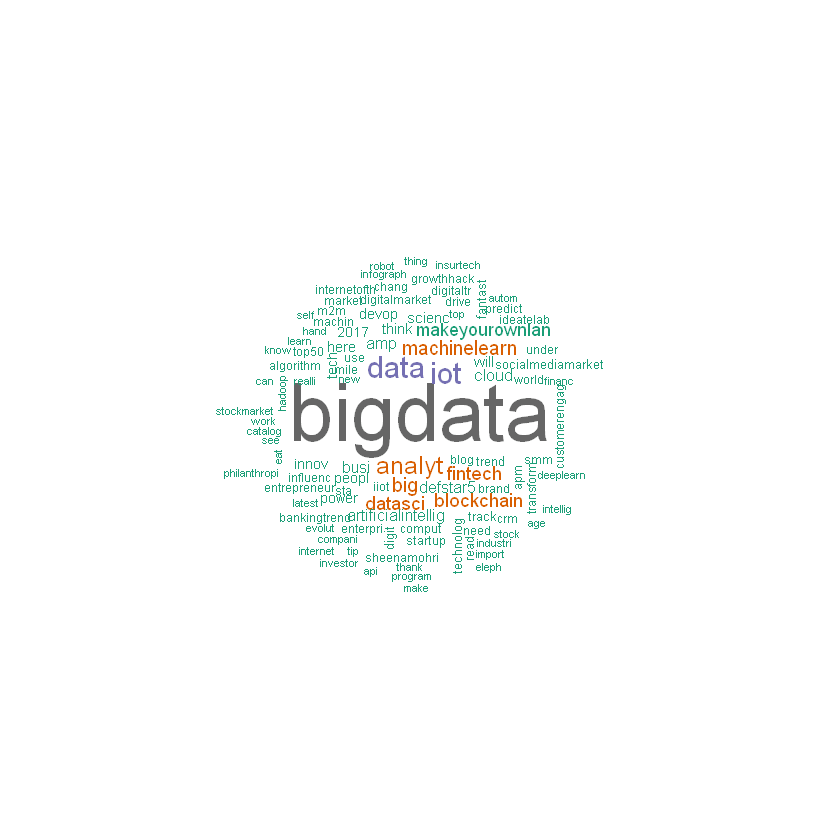

In [167]:
wordcloud( word=names(term.freq), freq=term.freq, min.freq=15, random.order=F, color=brewer.pal(8, 'Dark2') )

##### 3) 감성분석

In [168]:
hilton.tweets <- searchTwitter('@hilton', n=1500)

Warning message:
In doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, : 1500 tweets were requested but the API can only return 130

In [169]:
length( hilton.tweets )

[1] 130

In [171]:
hilton.tweets[[1]]
hilton.tweets[[2]]

[1] "meghanmcinnls: RT @BrandBastion: \"Responding to reviews is a simple and great way to retain customers.\" - @leediaz24 of @hilton #SMSSummit"

[1] "BusinessWire: @BCVSocial @hilton @TapastryHilton Thanks for sharing!"

- 긍정/부정 단어 사전을 만듬.

In [175]:
pos.word <- scan( "https://gist.githubusercontent.com/mkulakowski2/4289437/raw/1bb4d7f9ee82150f339f09b5b1a0e6823d633958/positive-words.txt"
                 , what='character', comment.char=';' )
neg.word <- scan( "https://gist.githubusercontent.com/mkulakowski2/4289441/raw/dad8b64b307cd6df8068a379079becbb3f91101a/negative-words.txt"
                 , what='character', comment.char=';' )

In [176]:
pos.word <- c(pos.word, 'upgrade' )
neg.word <- c(neg.word, 'wtf', 'wait', 'waiting', 'epicfail', 'mechanical' )

In [177]:
score.sentiment = function(sentences, pos.words, neg.words, .progress='none')
{
	require(plyr)
	require(stringr)
	
	# we got a vector of sentences. plyr will handle a list or a vector as an "l" for us
	# we want a simple array of scores back, so we use "l" + "a" + "ply" = laply:
	scores = laply(sentences, function(sentence, pos.words, neg.words) {
		
		# clean up sentences with R's regex-driven global substitute, gsub():
		sentence = gsub('[[:punct:]]', '', sentence)
		sentence = gsub('[[:cntrl:]]', '', sentence)
		sentence = gsub('\\d+', '', sentence)
		# and convert to lower case:
		sentence = tolower(sentence)

		# split into words. str_split is in the stringr package
		word.list = str_split(sentence, '\\s+')
		# sometimes a list() is one level of hierarchy too much
		words = unlist(word.list)

		# compare our words to the dictionaries of positive & negative terms
		pos.matches = match(words, pos.words)
		neg.matches = match(words, neg.words)
	
		# match() returns the position of the matched term or NA
		# we just want a TRUE/FALSE:
		pos.matches = !is.na(pos.matches)
		neg.matches = !is.na(neg.matches)

		# and conveniently enough, TRUE/FALSE will be treated as 1/0 by sum():
		score = sum(pos.matches) - sum(neg.matches)

		return(score)
	}, pos.words, neg.words, .progress=.progress )

	scores.df = data.frame(score=scores, text=sentences)
	return(scores.df)
}

In [181]:
sample <- c('I love you', 'I hate you', 'What a wonderful day!', 'I love you. I like you.' )
result <- score.sentiment ( sample, pos.word, neg.word)
result

,score,text
1,1,I love you
2,-1,I hate you
3,1,What a wonderful day!
4,2,I love you. I like you.
